Imports the RAG solution using path to the folder structure.

In [18]:
import matplotlib.pyplot as plt

import numpy as np

from ReES.babilong import BABILongAdapter, BABILongQuestionType


adapter = BABILongAdapter()

In [19]:
token_sizes = [1, 4, 8, 16, 32, 64, 128, 256]
qa_types = [BABILongQuestionType.qa1]

texts = {}
for token_size in token_sizes:
    texts[token_size] = adapter.batch_fetch_texts(token_size, qa_types)

In [20]:
means_word_count = list()
stds_word_count = list()

word_count_ys = list()
word_count_xs = list()
word_count_vectors = list()

for token_size in token_sizes:
    word_counts = list()
    mean_word_count = 0
    std_word_count = 0
    mean_words_per_token = 0

    num_texts = 100 # There are 100 texts for each token size by default

    
    for i in range(num_texts):
        text = texts[token_size][BABILongQuestionType.qa1][i].text
        text_word_count = len(text.split())
        word_counts.append(text_word_count)
        word_count_ys.append(text_word_count)
        word_count_xs.append(token_size)
    
    mean_word_count = np.mean(word_counts)
    std_word_count = np.std(word_counts)
    mean_words_per_token = mean_word_count / (token_size * 1000)
    mean_tokens_per_word = (token_size * 1000) / mean_word_count

    word_count_vectors.append(word_counts)
    
    means_word_count.append(mean_word_count)
    stds_word_count.append(std_word_count)
    print(f"mean ({token_size}k): {mean_word_count}")
    print(f"std ({token_size}k): {std_word_count}")
    print(f"mean words/token ({token_size}k): {mean_words_per_token}")
    print(f"mean tokens/word ({token_size}k): {mean_tokens_per_word}")


mean (1k): 485.32
std (1k): 57.98532228072894
mean words/token (1k): 0.48532
mean tokens/word (1k): 2.0604961674771287
mean (4k): 2546.24
std (4k): 219.76924807624928
mean words/token (4k): 0.6365599999999999
mean tokens/word (4k): 1.570943823048888
mean (8k): 5340.79
std (8k): 433.01527213251967
mean words/token (8k): 0.66759875
mean tokens/word (8k): 1.4979057405365124
mean (16k): 10808.85
std (16k): 990.5403310819809
mean words/token (16k): 0.675553125
mean tokens/word (16k): 1.4802684836962303
mean (32k): 22195.53
std (32k): 1442.7874996339551
mean words/token (32k): 0.6936103124999999
mean tokens/word (32k): 1.4417317360747863
mean (64k): 44208.93
std (64k): 3493.348551905464
mean words/token (64k): 0.69076453125
mean tokens/word (64k): 1.447671318894169
mean (128k): 88815.31
std (128k): 4786.102816896017
mean words/token (128k): 0.693869609375
mean tokens/word (128k): 1.4411929654920983
mean (256k): 174843.02
std (256k): 10092.675179534908
mean words/token (256k): 0.682980546875


Result is about ~ 1.45 tokens per word. Which is somewhat far from our expected 1-1 ratio. To get a more exact number one would likely have to do actual regression. 

In [21]:
from sklearn.linear_model import LinearRegression
# Word_count_xs is token size
# Word_count_ys is word count
X = np.array([word_count_x * 1000 for word_count_x in word_count_xs])[:, np.newaxis]
Y = np.array(word_count_ys)
X

array([[  1000],
       [  1000],
       [  1000],
       [  1000],
       [  1000],
       [  1000],
       [  1000],
       [  1000],
       [  1000],
       [  1000],
       [  1000],
       [  1000],
       [  1000],
       [  1000],
       [  1000],
       [  1000],
       [  1000],
       [  1000],
       [  1000],
       [  1000],
       [  1000],
       [  1000],
       [  1000],
       [  1000],
       [  1000],
       [  1000],
       [  1000],
       [  1000],
       [  1000],
       [  1000],
       [  1000],
       [  1000],
       [  1000],
       [  1000],
       [  1000],
       [  1000],
       [  1000],
       [  1000],
       [  1000],
       [  1000],
       [  1000],
       [  1000],
       [  1000],
       [  1000],
       [  1000],
       [  1000],
       [  1000],
       [  1000],
       [  1000],
       [  1000],
       [  1000],
       [  1000],
       [  1000],
       [  1000],
       [  1000],
       [  1000],
       [  1000],
       [  1000],
       [  1000

In [22]:
model = LinearRegression()
model.fit(X, Y)

LinearRegression()

In [23]:
word_count_pred = model.predict(X)

In [24]:
from sklearn.metrics import r2_score
r2 = r2_score(word_count_ys, word_count_pred)
model.coef_, 1/model.coef_, r2

(array([0.68507376]), array([1.45969683]), 0.9945235762406551)

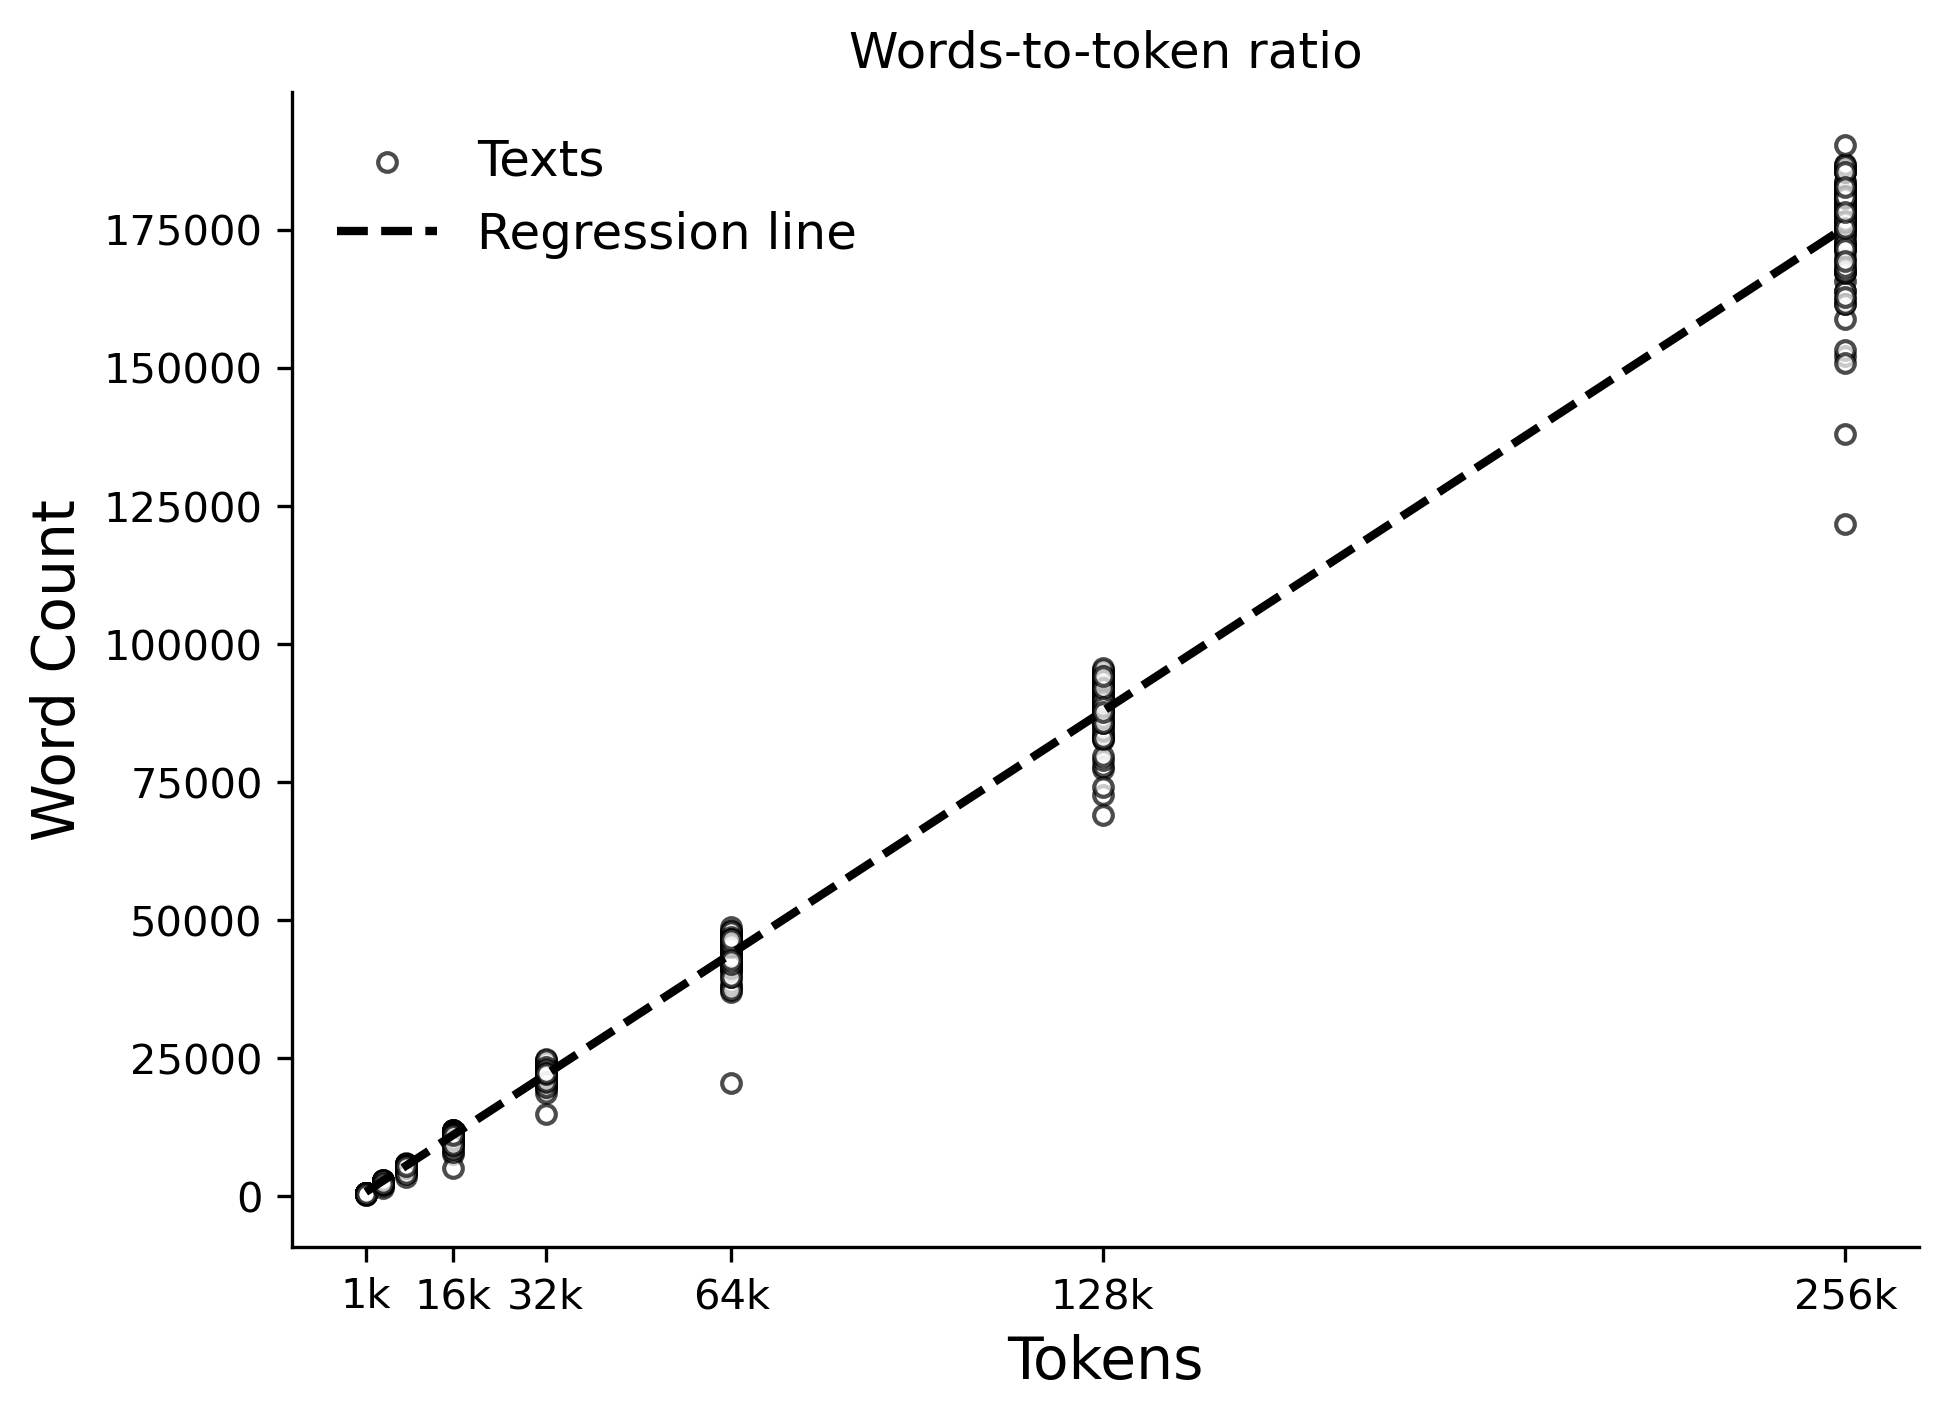

In [25]:
plt.figure(figsize=(7,5), dpi=300)
plt.scatter(word_count_xs, word_count_ys, color="white", edgecolors='black', marker='.', s=80, alpha=0.7, label="Texts")
plt.plot(word_count_xs, word_count_pred, color="black", linewidth=2, linestyle='--', label="Regression line")
plt.xlabel("Tokens", fontsize=14)
plt.ylabel("Word Count", fontsize=14)
plt.title("Words-to-token ratio")
#plt.xscale('log')
plotted_token_sizes = [1, 16, 32, 64, 128, 256]
plt.xticks(plotted_token_sizes, [f"{token_size}k" for token_size in plotted_token_sizes])
plt.legend(frameon=False, fontsize=12)

plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)

plt.show()

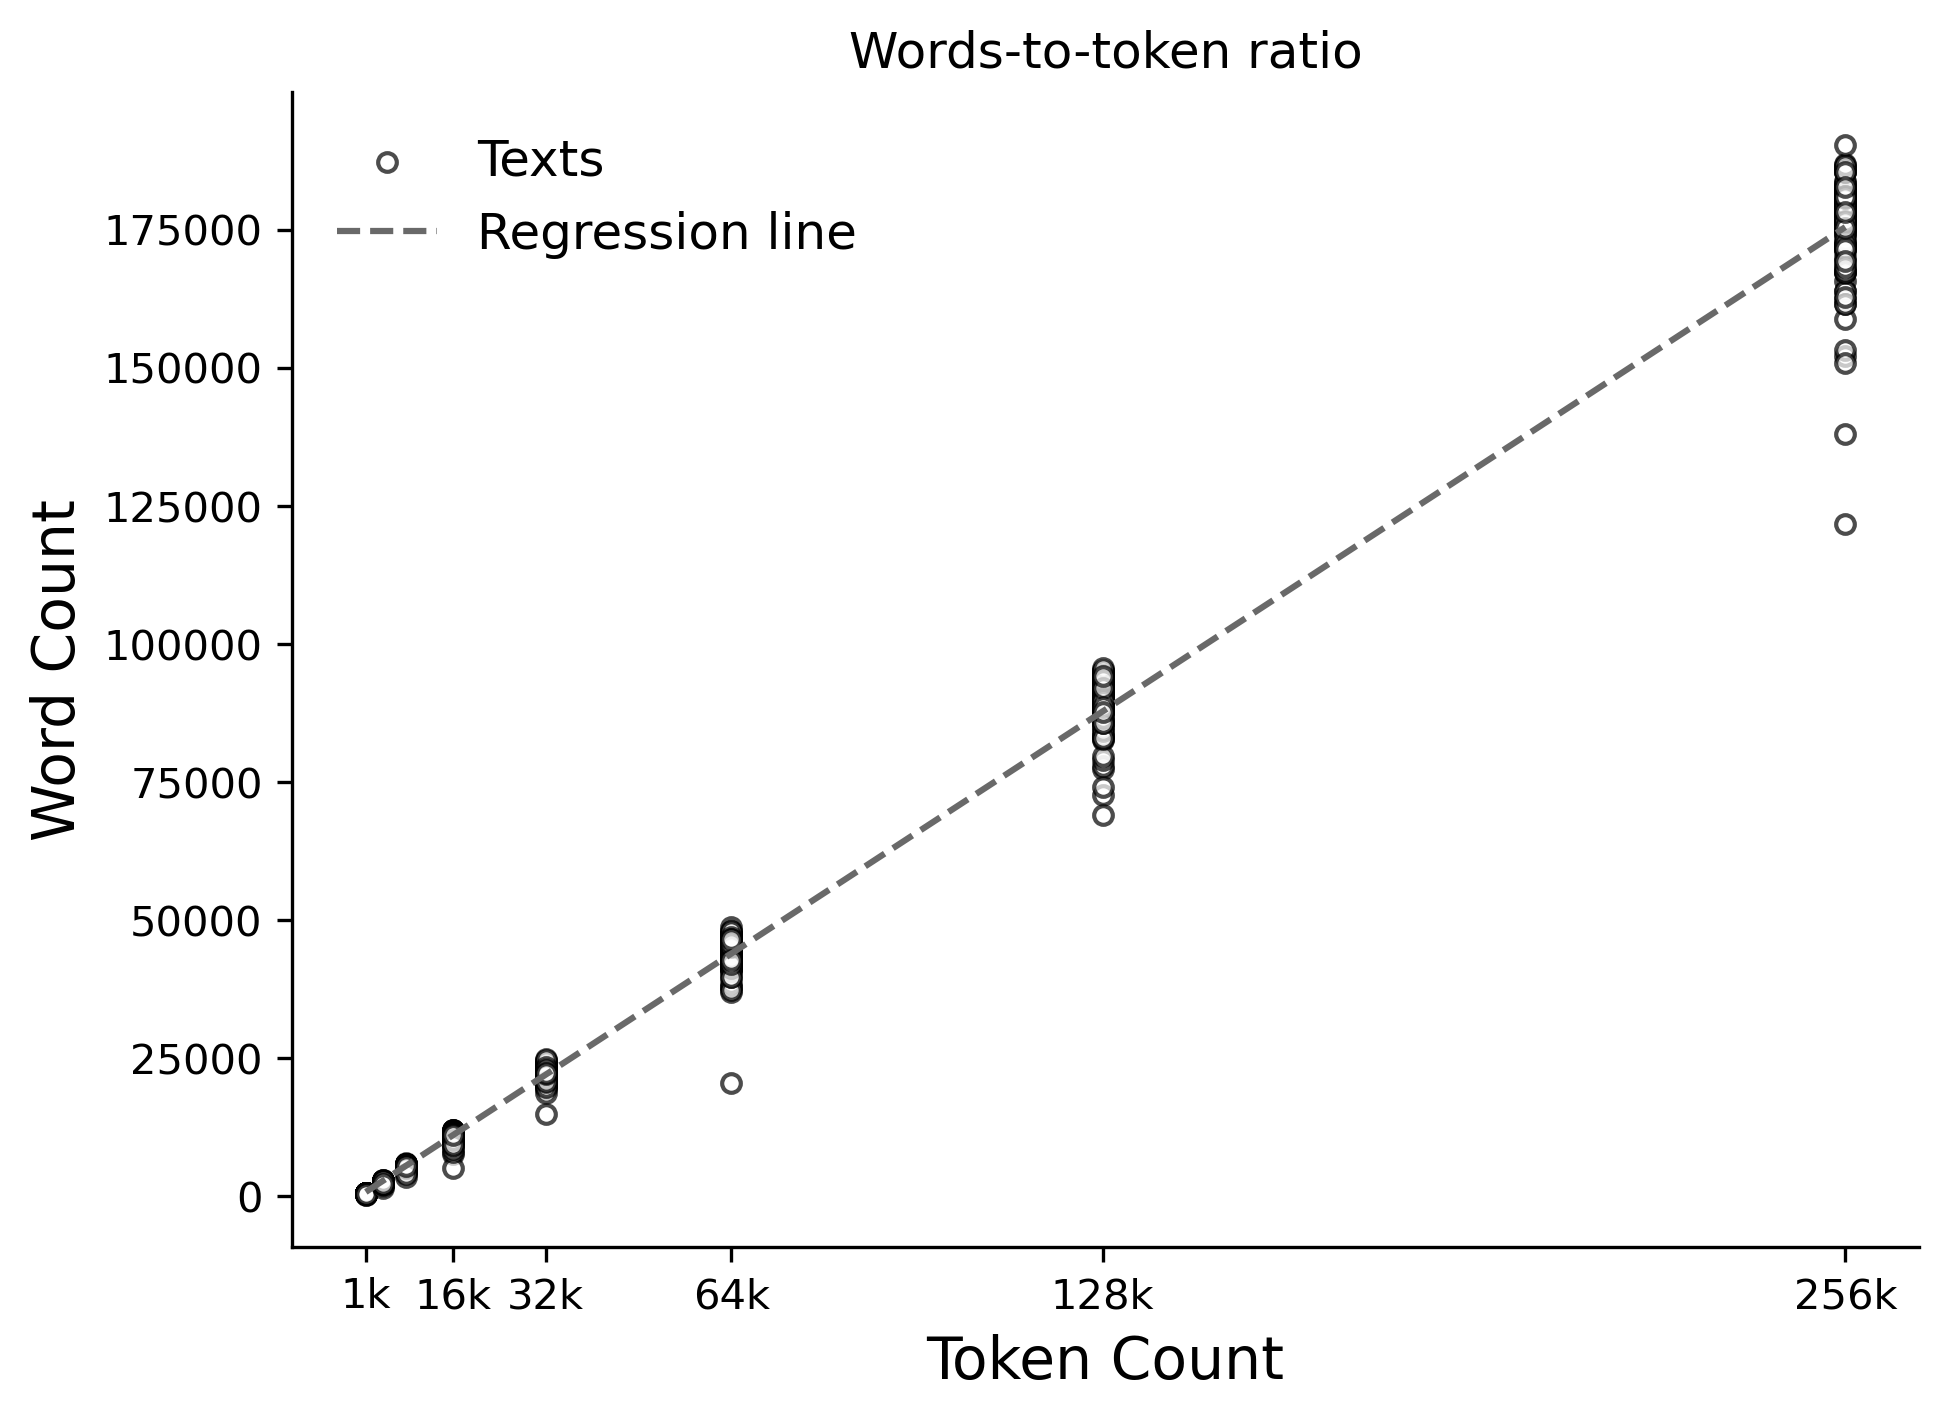

In [34]:
# https://matplotlib.org/stable/gallery/color/named_colors.html
plt.figure(figsize=(7,5), dpi=300)
plt.scatter(word_count_xs, word_count_ys, color="white", edgecolors='black', marker='.', s=80, alpha=0.7, label="Texts")
plt.plot(word_count_xs, word_count_pred, color="dimgray", linewidth=1.5, linestyle='--', label="Regression line")
plt.xlabel("Token Count", fontsize=14)
plt.ylabel("Word Count", fontsize=14)
plt.title("Words-to-token ratio")
#plt.xscale('log')
plotted_token_sizes = [1, 16, 32, 64, 128, 256]
plt.xticks(plotted_token_sizes, [f"{token_size}k" for token_size in plotted_token_sizes])
plt.legend(frameon=False, fontsize=12)

plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)

plt.show()